# 丢弃法Dropout

视频：https://www.bilibili.com/video/BV1Y5411c7aY?p=1

4.6章：https://zh-v2.d2l.ai/chapter_multilayer-perceptrons/dropout.html


·除了控制权重向量的维数和大小之外，dropout也是避免过拟合的另一种工具。它们通常是联合使用的。

·dropout常作用在多层感知机的隐藏层输出上，丢弃概率是控制模型复杂度的超参数

·dropout将激活值 h 替换为具有期望值 h 的随机变量。

·dropout仅在训练期间使用。

# 一、笔记

## 1.训练中使用丢弃法

>·通常将丢弃法用在**隐藏全连接层**的输出上  
>将dropout应用到隐藏层，以p的概率将隐藏单元置为零
>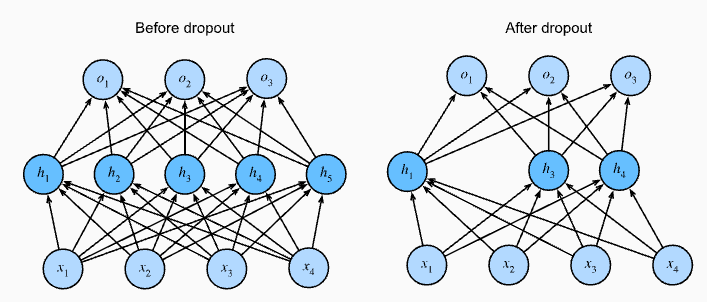 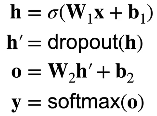


# 2.推理中的丢弃法

>正则项只在训练中使用：他们影响模型参数的更新  
>在推理过程中，丢弃法直接返回输出（无事发生）

---
---
---
# 二、代码

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

import torchvision
from torch.utils import data
from torchvision import transforms

## 1.导入数据集 fashion_mnist

In [2]:
# 数据集

batch_size = 256

# 用多个进程读数据
def get_dataloader_workers():  #@save
    """使用4个进程来读取数据。"""
    return 4


# 加载数据函数
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    # 数据格式转换    
    trans = transforms.Compose(trans)
    # 读取数据集
    mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
    # 加载数据集
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))


train_iter, test_iter = load_data_fashion_mnist(batch_size)

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## 2.创建神经网络

In [3]:
# 设置丢弃dropout概率
dropout1, dropout2 = 0.2, 0.5

# 构建神经网络
net = nn.Sequential(
        nn.Flatten(),         # 数据展平为1维
        nn.Linear(784, 256),  # 全连接层 维度变换 （28*28）->（256）
        nn.ReLU(),            # 激活函数Relu
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);


## 3.训练

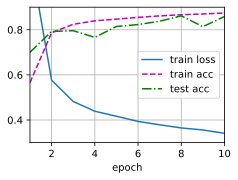

In [4]:
#定义训练次数num_epochs，精度lr，一次训练所选取的样本数batchsize
num_epochs, lr, batch_size = 10, 0.5, 256
# 定义损失函数
loss = nn.CrossEntropyLoss()



trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)